In [288]:
import numpy as np

In [10]:
def pairExistsBrute( arr,  n,  S):
    for i in range (0, n-2):
        for j in range(i+1 , n-1):
            if(arr[i] + arr[j] == S):
                return (i,j)
    return (-1,-1)

In [11]:
arr = [1,2,3,4,6]
i,j = pairExistsBrute(arr, len(arr), 6)
print(arr[i], arr[j])

2 4


In [18]:
def pairExists(arr, n, S):
    i = 0
    j = n-1
    while( i < j):
        Y = arr[i] + arr[j]
        if ( Y == S):
            return (i,j)
        elif ( Y < S ):
            i = i + 1
        elif ( Y > S ):
            j = j - 1    
    return (-1,-1)

In [19]:
arr = [1,2,3,4,6]
i,j = pairExists(arr, len(arr), 6)
print(arr[i], arr[j])

2 4


In [291]:
#Creating a Linked List in Python:
class Node:  
    def __init__(self, data):  
        self.data = data  
        self.next = None 
class LinkedList: 
    def __init__(self): 
        self.head = None
      
    def push(self, new_data): 
        new_node = Node(new_data) 
        new_node.next = self.head 
        self.head = new_node

list1 = LinkedList() 
list1.push(5) 
list1.push(4) 
list1.push(9) 
list1.push(8) 
list1.push(3) 
list1.push(1)
list1



In [292]:
def printMiddle(list1): 
    slow_ptr = list1.head 
    fast_ptr = list1.head 

    if list1.head is not None: 
        while (fast_ptr is not None and fast_ptr.next is not None): 
            fast_ptr = fast_ptr.next.next
            slow_ptr = slow_ptr.next
    return slow_ptr.data 

In [293]:
slow=printMiddle(list1)
print("The middle element is: ", slow)

The middle element is:  9


In [298]:
def printMiddleBrute(list1): 
        node_count = 0
        temp = list1.head
        while temp is not None: 
            node_count = node_count + 1
            temp = temp.next
        i = 0
        temp = list1.head
        while i < node_count/2:
            i = i+1
            temp = temp.next
            
        return temp.data

In [299]:
temp=printMiddleBrute(list1)
print("The middle element is: ", temp)

The middle element is:  9


In [97]:
def findMaxSumBrute(arr, n, k):
    bestSum = -99999999
    for i in range (0, n):
        S = 0
        if i+k <= n:
            for j in range(i,i+k) :            
                S = S + arr[j];
            bestSum = max(S, bestSum)
    return bestSum


In [102]:
arr = [1,2,3,1,4,5,2,3]
win_sz=3
S = findMaxSumBrute(arr, len(arr),win_sz)
print(S)

11


In [136]:
def findMaxSum(arr,arr_sz,win_sz):
    S = 0 
    bestSum = -999999999
    for i in range (0, win_sz):
        S = S + arr[i]
    
    for i in range (1, arr_sz):
        bestSum = max(bestSum, S)
        if(i+win_sz)> arr_sz-1:
            break
        S = S - arr[i]
        S = S + arr[i+win_sz]
    return bestSum



In [137]:
arr = [1,2,3,1,4,5,2,3]
S = findMaxSum(arr, len(arr), 3)
print(S)

11


In [184]:
def findSubString(string, len1, pat,len2):   
    hash_pat,hash_str  = [0] * 256,[0] * 256
    
    # store occurrence of characters of pattern  
    for i in range(0, len2):
        c = ord(pat[i])
        hash_pat[c] = hash_pat[c]+ 1
        
    # start traversing the string  
    start, left, right,best_win_min_len = 0, -1, -1,99999999 
    match_count = 0 
    for i in range(0, len1):  
        c = ord(string[i])
        hash_str[c] = hash_str[c] + 1
  
        # If string's char matches with  
        # pattern's char then increment count  
        if (hash_pat[c] != 0 and hash_str[c] <= hash_pat[c]):  
            match_count = match_count+ 1
  
        # if all the characters are matched  
        if match_count == len2:  
              
            # Try to minimize the window i.e., check if  
            # any character is occurring more no. of times  
            # than its occurrence in pattern, if yes  
            # then remove it from starting and also remove  
            # the useless characters.
            s=ord(string[start])
            while (hash_str[s] > hash_pat[s] or hash_pat[s] == 0):                
                if (hash_str[s] >  hash_pat[s]):  
                    hash_str[s] = hash_str[s]- 1
                start = start+ 1
                s=ord(string[start])
              
            # update the best window size  
            win_sz = i - start + 1
            if best_win_min_len > win_sz:              
                best_win_min_len = win_sz  
                left = start
                right = left + best_win_min_len
                  
    # Return substring starting from  
    # start_index and length min_len  
    return (left, right)

In [185]:
stri="this is a test string"
patt="tist"
start,end=findSubString(stri,len(stri),patt,len(patt))
print(stri[start:end])

t stri


In [321]:
def findSubStringBrute(string, len1, pat,len2):      
    count_pat = [0] * 256 
    for i in range(len2): 
        count_pat[ord(pat[i])] += 1

    minl,left,right = 99999999999,-1,-1    
    for i in range(0,len1): 
        for j in range(1,len1): 
            subs = string[i:j] 
            subs_lenght = len(subs)
            
            #get the substring count
            count_sub = [0] * 256 
            for x in range(subs_lenght): 
                try:
                    count_sub[ord(subs[x])] += 1
                except:
#                     print(subs[x])
                    pass

            flag = False      
            for x in range(len2): 
                o = ord(pat[x])
                if count_pat[o] > 0 and count_pat[o] <= count_sub[o]:
                    flag = True
                else:
                    flag = False
                    break

            # We have to check here both conditions together 
            # 1. substring's characters are equal to pattern's  characters 
            # 2. substing's length should be minimum  
            if (subs_lenght < minl and flag == True): 
                minl = subs_lenght 
                left,right=i, j

#     return minl
    return(left,right)

In [313]:
stri="this is a test string"
patt="tist"
start,end=findSubStringBrute(stri,len(stri),patt,len(patt))

print(stri[start:end])
# print(minl)

t stri


10000


In [327]:
import time
# generate random integer values
from random import seed
from random import randint


def run_check(total_nos):
    # seed random number generator
    seed(1)

    arr = []
    # generate some integers
    for i in range(total_nos):
        value = randint(0, 10)
        arr.append(value)
    print(len(arr))

    win_sz=5

    list1 = LinkedList() 
    for i in arr:
        list1.push(i)

    start_time = time.time()
    i,j = pairExistsBrute(arr, len(arr), 6)
    end_time = time.time()
    print("Sum of 2 nos Brute : ", end_time-start_time,":::", arr[i], arr[j])

    start_time = time.time()
    i,j = pairExists(arr, len(arr), 6)
    end_time = time.time()
    print("Sum of 2 nos Two Ptr: ",end_time-start_time,":::",  arr[i], arr[j])

    start_time = time.time()
    mid=printMiddleBrute(list1)
    end_time = time.time()
    print("Middle element of linked list Brute : ",end_time-start_time,":::", mid)

    start_time = time.time()
    mid=printMiddle(list1)
    end_time = time.time()
    print("Middle element of linked list Two Ptr: ",end_time-start_time,":::", mid)


    start_time = time.time()
    S = findMaxSumBrute(arr, len(arr),win_sz)
    end_time = time.time()
    print("Max sum of m consecutive Brute: ",end_time-start_time,":::",S)

    start_time = time.time()
    S = findMaxSum(arr, len(arr), win_sz)
    end_time = time.time()
    print("Max sum of m consecutive Two Ptr: ",end_time-start_time,":::",S)


# data = open('data_2paras.txt', 'r').read()
# patt="the"

# start_time = time.time()
# start,end=findSubStringBrute(data,len(data),patt,len(patt))
# end_time = time.time()
# print("Smallest substring Brute :",end_time-start_time,":::",data[start:end])

# start_time = time.time()
# start,end=findSubString(data,len(data),patt,len(patt))
# end_time = time.time()
# print("Smallest substring Two Pointer :",end_time-start_time,":::",data[start:end])


In [328]:
run_check(100)
run_check(1000)
run_check(10000)
run_check(30000)
run_check(50000)

100
Sum of 2 nos Brute :  0.0 ::: 2 4
Sum of 2 nos Two Ptr:  0.0 ::: 2 2
Middle element of linked list Brute :  0.0 ::: 8
Middle element of linked list Two Ptr:  0.0 ::: 8
Max sum of m consecutive Brute:  0.0 ::: 43
Max sum of m consecutive Two Ptr:  0.0 ::: 38
1000
Sum of 2 nos Brute :  0.0 ::: 2 4
Sum of 2 nos Two Ptr:  0.0 ::: 10 10
Middle element of linked list Brute :  0.0 ::: 7
Middle element of linked list Two Ptr:  0.0 ::: 7
Max sum of m consecutive Brute:  0.0 ::: 45
Max sum of m consecutive Two Ptr:  0.0 ::: 40
10000
Sum of 2 nos Brute :  0.0 ::: 2 4
Sum of 2 nos Two Ptr:  0.015587329864501953 ::: 2 2
Middle element of linked list Brute :  0.0 ::: 2
Middle element of linked list Two Ptr:  0.0 ::: 2
Max sum of m consecutive Brute:  0.015621423721313477 ::: 49
Max sum of m consecutive Two Ptr:  0.0 ::: 44
30000
Sum of 2 nos Brute :  0.0 ::: 2 4
Sum of 2 nos Two Ptr:  0.0 ::: 2 2
Middle element of linked list Brute :  0.015623331069946289 ::: 4
Middle element of linked list Two 

In [329]:
run_check(100000)
run_check(200000)
run_check(500000)



100000
Sum of 2 nos Brute :  0.0 ::: 2 4
Sum of 2 nos Two Ptr:  0.01566290855407715 ::: 5 5
Middle element of linked list Brute :  0.031208038330078125 ::: 7
Middle element of linked list Two Ptr:  0.0156557559967041 ::: 7
Max sum of m consecutive Brute:  0.10019993782043457 ::: 50
Max sum of m consecutive Two Ptr:  0.05341005325317383 ::: 45
200000
Sum of 2 nos Brute :  0.0 ::: 2 4
Sum of 2 nos Two Ptr:  0.0 ::: 2 4
Middle element of linked list Brute :  0.05335569381713867 ::: 5
Middle element of linked list Two Ptr:  0.015659093856811523 ::: 5
Max sum of m consecutive Brute:  0.23183178901672363 ::: 50
Max sum of m consecutive Two Ptr:  0.08469271659851074 ::: 45
500000
Sum of 2 nos Brute :  0.0 ::: 2 4
Sum of 2 nos Two Ptr:  0.11589694023132324 ::: 10 10
Middle element of linked list Brute :  0.18486309051513672 ::: 5
Middle element of linked list Two Ptr:  0.1001126766204834 ::: 5
Max sum of m consecutive Brute:  0.5169763565063477 ::: 50
Max sum of m consecutive Two Ptr:  0.25406

In [330]:
run_check(1000000)
run_check(2000000)
run_check(3000000)
run_check(5000000)
run_check(7500000)
run_check(9000000)

1000000
Sum of 2 nos Brute :  0.0 ::: 2 4
Sum of 2 nos Two Ptr:  0.2475292682647705 ::: 5 5
Middle element of linked list Brute :  0.23179221153259277 ::: 10
Middle element of linked list Two Ptr:  0.08464717864990234 ::: 10
Max sum of m consecutive Brute:  1.1185171604156494 ::: 50
Max sum of m consecutive Two Ptr:  0.46979570388793945 ::: 45
2000000
Sum of 2 nos Brute :  0.0 ::: 2 4
Sum of 2 nos Two Ptr:  0.5479798316955566 ::: 10 10
Middle element of linked list Brute :  0.4010121822357178 ::: 5
Middle element of linked list Two Ptr:  0.21624016761779785 ::: 5
Max sum of m consecutive Brute:  2.3743250370025635 ::: 50
Max sum of m consecutive Two Ptr:  1.0339598655700684 ::: 45
3000000
Sum of 2 nos Brute :  0.0 ::: 2 4
Sum of 2 nos Two Ptr:  0.8396601676940918 ::: 3 3
Middle element of linked list Brute :  0.7018232345581055 ::: 7
Middle element of linked list Two Ptr:  0.3007533550262451 ::: 7
Max sum of m consecutive Brute:  3.482668876647949 ::: 50
Max sum of m consecutive Two Pt

In [ ]:
run_check(10000000)
run_check(20000000)
# run_check(30000000)
# run_check(50000000)

10000000
Sum of 2 nos Brute :  0.0 ::: 2 4
Sum of 2 nos Two Ptr:  2.599637985229492 ::: 6 6
Middle element of linked list Brute :  2.453005075454712 ::: 5
Middle element of linked list Two Ptr:  1.0870206356048584 ::: 5
Max sum of m consecutive Brute:  11.619394302368164 ::: 50
Max sum of m consecutive Two Ptr:  5.46578311920166 ::: 45
20000000
Sum of 2 nos Brute :  0.0 ::: 2 4
Sum of 2 nos Two Ptr:  5.7483556270599365 ::: 2 2
Middle element of linked list Brute :  4.7141642570495605 ::: 6
Middle element of linked list Two Ptr:  2.2218339443206787 ::: 6
Max sum of m consecutive Brute:  25.48144793510437 ::: 50
Max sum of m consecutive Two Ptr:  11.049089908599854 ::: 45


In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df=pd.read_csv('result_2ptr_test.csv')
df


,no of array elements,Sum of 2 nos Brute,Sum of 2 nos Two Ptr,Middle element of linked list Brute,Middle element of linked list Two Ptr,Max sum of m consecutive Brute,Max sum of m consecutive Two Ptr
0,100,0,0.000000,0.000000,0.000000,0.000000,0.000000
1,1000,0,0.000000,0.000000,0.000000,0.000000,0.000000
2,10000,0,0.015587,0.000000,0.000000,0.015621,0.000000
3,30000,0,0.000000,0.015623,0.000000,0.031279,0.022167
4,50000,0,0.000000,0.015625,0.000000,0.046863,0.034838
5,100000,0,0.015663,0.031208,0.015656,0.100200,0.053410
6,200000,0,0.000000,0.053356,0.015659,0.231832,0.084693
7,500000,0,0.115897,0.184863,0.100113,0.516976,0.254061
8,1000000,0,0.247529,0.231792,0.084647,1.118517,0.469796
9,2000000,0,0.547980,0.401012,0.216240,2.374325,1.033960


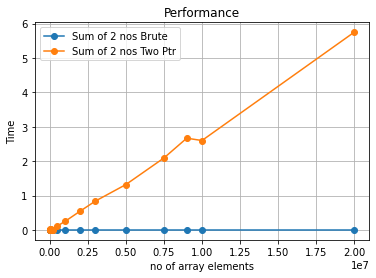

In [43]:
# plot with various axes scales
plt.plot(df['no of array elements'],df['Sum of 2 nos Brute'], 
             label='Sum of 2 nos Brute',marker = 'o')
plt.plot(df['no of array elements'],df['Sum of 2 nos Two Ptr'],
         label='Sum of 2 nos Two Ptr',marker = 'o')
plt.xlabel('no of array elements')
plt.ylabel('Time')
plt.title('Performance')
plt.grid(True)
plt.legend()


plt.show()

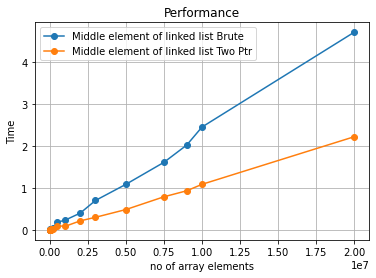

In [44]:

plt.plot(df['no of array elements'],df['Middle element of linked list Brute'], 
         label='Middle element of linked list Brute',marker = 'o')
plt.plot(df['no of array elements'],df['Middle element of linked list Two Ptr'], 
         label='Middle element of linked list Two Ptr',marker = 'o')
plt.xlabel('no of array elements')
plt.ylabel('Time')
plt.title('Performance')
plt.grid(True)
plt.legend()
plt.show()



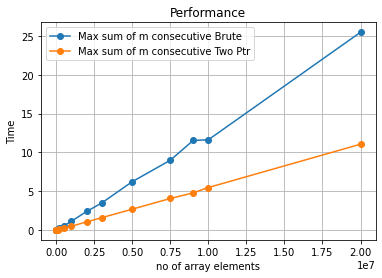

In [45]:
plt.plot(df['no of array elements'],df['Max sum of m consecutive Brute'], 
         label='Max sum of m consecutive Brute',marker = 'o')
plt.plot(df['no of array elements'],df['Max sum of m consecutive Two Ptr'], 
         label='Max sum of m consecutive Two Ptr',marker = 'o')
plt.xlabel('no of array elements')
plt.ylabel('Time')
plt.title('Performance')
plt.grid(True)
plt.legend()
plt.show()